# Problem Statement


The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

   1. Data sourcing and sentiment analysis
   2. Building a recommendation system
   3. Improving the recommendations using the sentiment analysis model
   4. Deploying the end-to-end project with a user interface

Steps involved in the project 
1. Exploratory data analysis
2. Data cleaning
3. Text preprocessing
4. Feature extraction 
4. Training the text classification model
5. Creating a recommedation systems (User based and Item Based choose the bestone)
6. Evaluating the model and recommedation system using the Test data 
7. Create flask application 
8. Deploy the application to heroku platform 

In [5]:
#importing libraries 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
%matplotlib inline



from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score,accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [6]:
pd.set_option('max_colwidth', 500)

# 1. Exploratory Analysis

In [8]:
# Reading the input from folder 
master_df = pd.read_csv('dataset/sample30.csv')
df=master_df.copy()
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
1024,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window",Windex,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),2015-01-06T00:00:00.000Z,False,True,5,"I have always used Windex, and I don't plan on changing!!",Windex,NaN,NaN,chesneesherrie,Negative
2426,AVpe41TqilAPnD_xQH3d,FOX,"Movies & TV Shows,Movies,Romance,Romantic Comedies,Movies, Music & Books,Comedy,Movies & TV,Ways To Shop Entertainment,Recent Release & 4k Movies Sale,Movies & Music,Holiday Shop",Twentieth Century Fox,Mike Dave Need Wedding Dates (dvd + Digital),2017-01-27T00:00:00.000Z,NaN,True,5,This is funny with a good story. It also has a good ending.,Good Date Movie,NaN,NaN,bruce,Positive
24423,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys",Test,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2014-09-19T00:00:00.000Z,NaN,True,4,One of the best blu rays I ever bought its a good buy,Best Godzilla movie ever,NaN,NaN,drocc,Positive
8834,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2012-02-03T03:33:30.000Z,NaN,True,5,love it!!! this is the most amazing product ever and the smell is great have to have it,Love,NaN,NaN,berreca,Positive
6954,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-02-09T00:00:00.000Z,False,True,4,I have pet at home and young children. this product is easy and convenient when bi have to get rid of a mess quick. This review was collected as part of a promotion.,great,NaN,NaN,sol003,Positive


In [9]:
### Total reviews
total = len(df['reviews_text'])
print ("Number of reviews: ",total)

### How many unique reviewers?
print ("Number of unique reviewers: ",len(df['reviews_username'].unique()))
reviewer_prop = float(len(df['reviews_username'].unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))

### Average star score
print ("Average rating score: ",round(df['reviews_rating'].mean(),3))

Number of reviews:  30000
Number of unique reviewers:  24915
Prop of unique reviewers:  0.831
Average rating score:  4.483


In [10]:
#data overivew
print('rows: ', df.shape[0])
print('columns: ', df.shape[1])
print('\nfeatures: ', df.columns.to_list())
print('\nmissing vlues: ', df.isnull().values.sum())
print('\nUnique values: \n', df.nunique())

rows:  30000
columns:  15

features:  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

missing vlues:  74980

Unique values: 
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


In [11]:
# Info of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

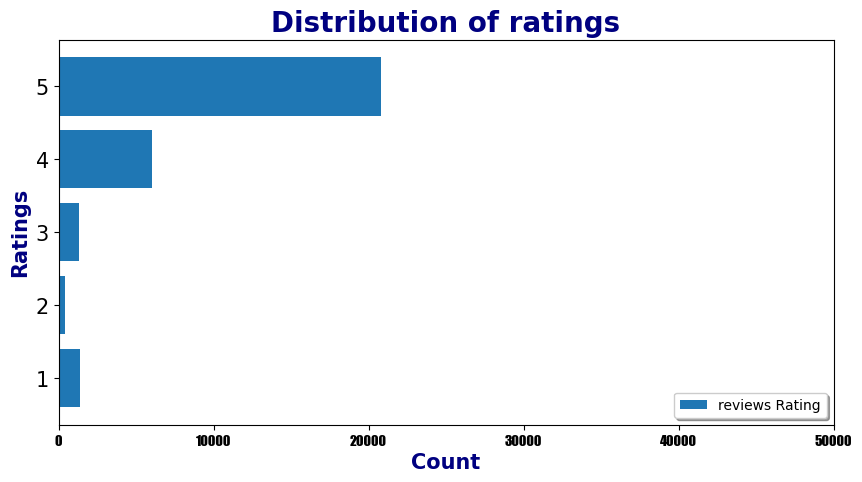

In [12]:
# Number of occurences for each rating 
#plot ratings frequency
plt.figure(figsize=[10,5]) #[width, height]
x = list(df['reviews_rating'].value_counts().index)
y = list(df['reviews_rating'].value_counts())
plt.barh(x, y)
ticks_x = np.linspace(0, 50000, 6) # (start, end, no of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks(size=15)

plt.title('Distribution of ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['reviews Rating'], shadow=True, loc=4)

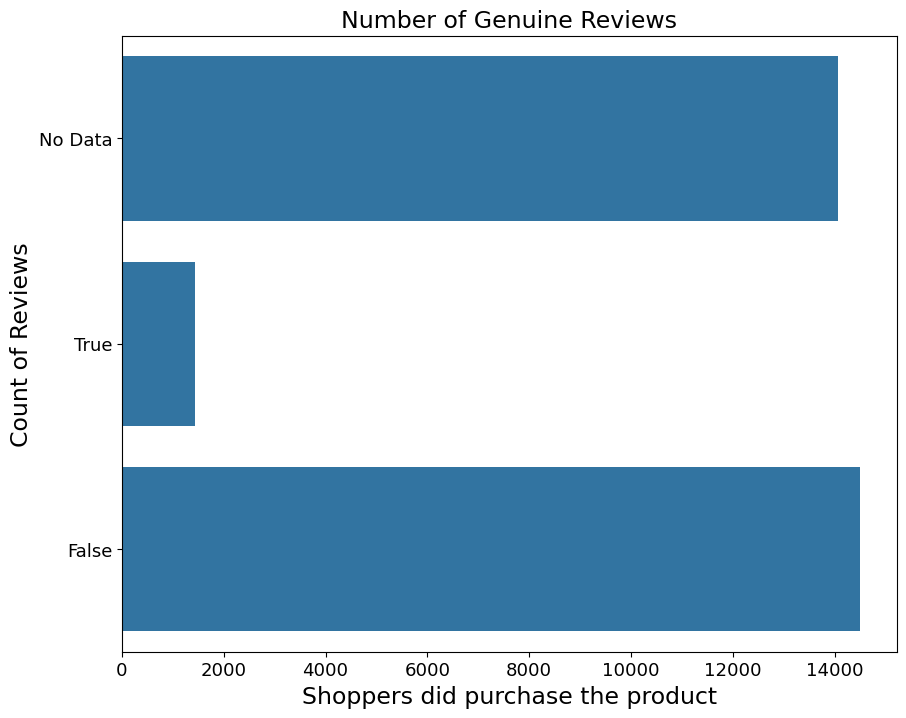

In [13]:
# Number of Postive and Negatives in the data frame showing the class imbalance
#Replace the Nan values to No Data for reviewers did purchase or not
df['reviews_didPurchase'].fillna('No Data', inplace=True)
#Distribution of reviews for actual purchasing customers
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

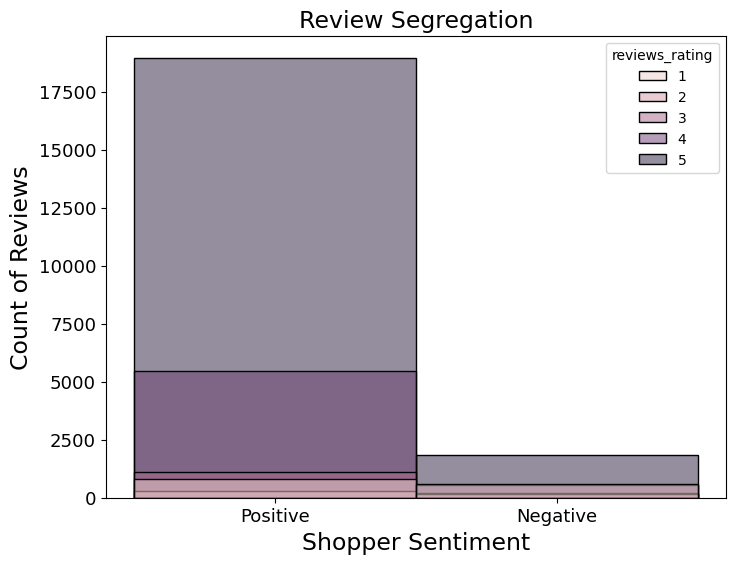

In [14]:
# To see any corrections are required in the dataframe is required using rating and user sentiment 
# from IPython.core.pylabtools import figsize
# figsize(10,10)
# sns.histplot(hue=df['reviews_rating'],x=df['user_sentiment'])
# plt.yticks(np.arange(0,30000,10000))
# plt.show()

plt.figure(figsize=(8,6))
ax = sns.histplot(hue=df['reviews_rating'],x=df['user_sentiment'])
ax.set_xlabel(xlabel="Shopper Sentiment", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Review Segregation', fontsize=17)
ax.tick_params(labelsize=13)

In [15]:
df['user_sentiment'].value_counts()

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64

* We need to correct the data available in the sentiments considering the rating of users

In [17]:
# To download the stopwords from NLTK library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/rdas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

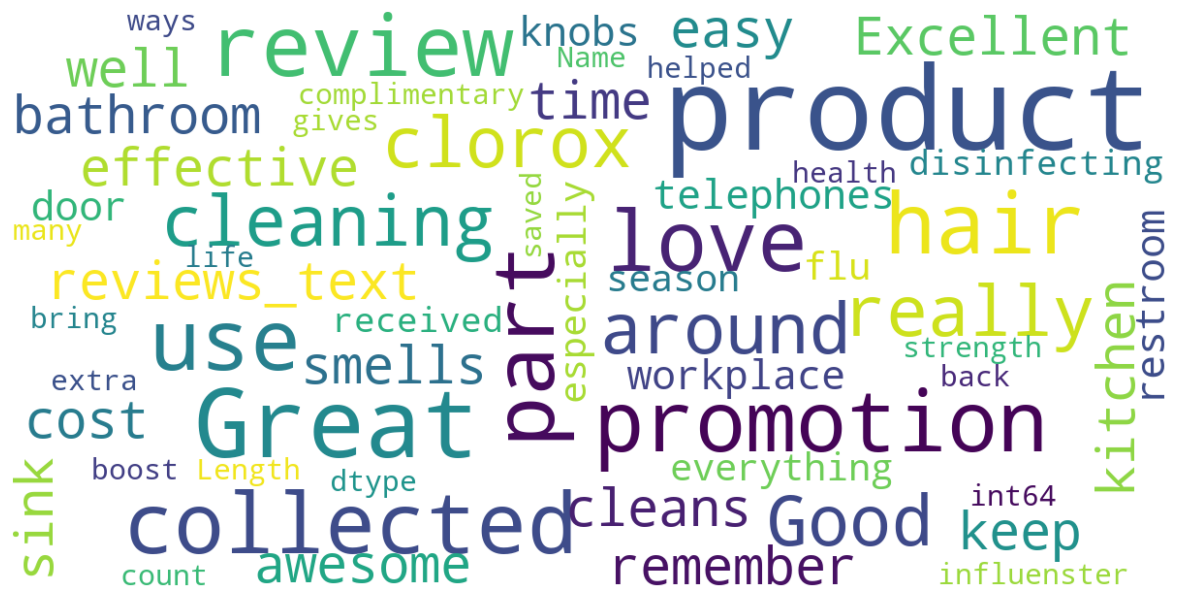

In [18]:
# To Check the most word occurence using word cloud
from wordcloud import WordCloud ,STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40,
                     scale=3, random_state=1).generate(str(df['reviews_text'].value_counts()))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#  2. Data Cleaning

In [20]:
# Finding the number of rows with Null values
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase         0
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [21]:
#shape of the dataframe
df.shape

(30000, 15)

In [22]:
#From the null values percentages, columns reviews_userCity and reviews_userProvince can be dropped 
df = df.drop(columns=['reviews_userCity','reviews_userProvince'],axis=1)
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Data,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [23]:
# Finding the number of rows with Null values
print("shape of the dataframe =",df.shape)
df.isnull().sum()/len(df)

shape of the dataframe = (30000, 13)


id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.004700
name                   0.000000
reviews_date           0.001533
reviews_didPurchase    0.000000
reviews_doRecommend    0.085667
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.006333
reviews_username       0.002100
user_sentiment         0.000033
dtype: float64

In [24]:
# Before Updating the user sentiment columns
df['user_sentiment'].value_counts()

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64

In [25]:
# for correcting the user sentiment according to rating 
def review_sentiment_clear(x):
  if x >= 3 :
    return 'Postive'
  elif x > 0 and x < 3  :
    return 'Negative' 

In [26]:
df['user_sentiment'] = df['reviews_rating'].apply(review_sentiment_clear)
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Data,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Postive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Postive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Postive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [27]:
# After corrections for user sentiment 
df['user_sentiment'].value_counts()

user_sentiment
Postive     28196
Negative     1804
Name: count, dtype: int64

# 3. Text Preprocessing 

### Text lower cased , removed Special Charater and lemmatized

In [30]:
#Common functions for cleaning the text data 
import nltk
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import html

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    """Remove the special Characters"""
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

stopword_list= stopwords.words('english')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

[nltk_data] Downloading package punkt to /Users/rdas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rdas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rdas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/rdas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [31]:
def normalize_and_lemmaize(input_text):
    input_text = remove_special_characters(input_text)
    words = nltk.word_tokenize(input_text)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [32]:
# Take the Review comment and user sentiment as dataframe 
review_df = df[['reviews_text','user_sentiment']]
review_df.head()

,reviews_text,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Postive
1,Good flavor. This review was collected as part of a promotion.,Postive
2,Good flavor.,Postive
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative


In [33]:
# create a new column lemmatized_review using the emmatize_text function
review_df['lemmatized_text'] = review_df['reviews_text'].map(lambda text: normalize_and_lemmaize(text))
review_df.head()

/var/folders/_f/n_ppftfs74z40h1_826nlnpr0000gn/T/ipykernel_10689/3734498083.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Postive,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy
1,Good flavor. This review was collected as part of a promotion.,Postive,good flavor review collect part promotion
2,Good flavor.,Postive,good flavor
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel


In [34]:
# new dataframe with lemmatized text and user sentiment 
review_new_df = review_df[['lemmatized_text','user_sentiment']]
review_new_df

,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy,Postive
1,good flavor review collect part promotion,Postive
2,good flavor,Postive
3,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess,Negative
4,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel,Negative
...,...,...
29995,get conditioner influenster try im love far oily hair use end hair feel amaze soft mess review collect part promotion,Postive
29996,love receive review purpose influenster leave hair feel fresh smell great,Postive
29997,first love smell product wash hair smooth easy brush receive product influenster test purpose opinions review collect part promotion,Postive
29998,receive influenster never go back anything else normally dont use conditioner hair oily fine make hair feel heavy doesnt get oily day really fantastic plan buy future review collect part promotion,Postive


In [35]:
#Encode the negative and postive to 0 and 1 respectively 
review_new_df['user_sentiment'] = review_new_df['user_sentiment'].map({'Negative':0,'Postive':1})
review_new_df.head()

/var/folders/_f/n_ppftfs74z40h1_826nlnpr0000gn/T/ipykernel_10689/125465557.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound hype listen everyday gym give star rat way metaphors crazy,1
1,good flavor review collect part promotion,1
2,good flavor,1
3,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect im disappoint pay much lube wont use could use normal personal lubricant less money less mess,0
4,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel,0


### Dividing the dataset into train and test data and handle the class imbalance

In [37]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [38]:
# Train and Test Divide
x_train,x_test,y_train,y_test = train_test_split(review_new_df['lemmatized_text'],review_new_df['user_sentiment'],train_size=0.75,random_state=45,stratify=review_new_df['user_sentiment'])
y_train.value_counts()

user_sentiment
1    21147
0     1353
Name: count, dtype: int64

# 4. Feature Extraction using Count Vectorizer and TFIDF Transformer 

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
x_count = count_vect.fit_transform(x_train)


tfidf_transformer = TfidfTransformer()
x_train_transformed = tfidf_transformer.fit_transform(x_count)
x_train_transformed.shape

(22500, 14711)

In [41]:
#creating the pickle for countvectorizer and TFIDF Transformer
import pickle
pickle.dump(count_vect,open('pickle_file/count_vector.pkl','wb'))
pickle.dump(tfidf_transformer,open('pickle_file/tfidf_transformer.pkl','wb'))

In [42]:
count = Counter(y_train)
print('Before sampling :',count)

sampler = SMOTE()

x_train_sm,y_train_sm = sampler.fit_resample(x_train_transformed,y_train)

count = Counter(y_train_sm)
print('After sampling :',count)

Before sampling : Counter({1: 21147, 0: 1353})
After sampling : Counter({1: 21147, 0: 21147})


# 5. Training text classification model
- Logistic Regression
- Random Forest Classifer
- XGBoost
#### Choose the best model with hyperparameter tuning 

In [44]:
# Define a Function to calculate and print model Metrics
performance=[]

def model_metrics(y,y_pred,model_name,metrics):
  Accuracy = accuracy_score(y,y_pred)
  roc = roc_auc_score(y,y_pred)
  confusion = confusion_matrix(y,y_pred)
  precision = precision_score(y,y_pred)
  f1 = f1_score(y,y_pred)
  TP = confusion[1,1]  # true positive
  TN = confusion[0,0]  # true negatives
  FP = confusion[0,1]  # false positives
  FN = confusion[1,0]  # false negatives
  sensitivity= TP / float(TP+FN)
  specificity = TN / float(TN+FP)

  print("*"*50)
  print('Confusion Matrix =')
  print(confusion)
  print("sensitivity of the %s = %f" % (model_name,round(sensitivity,2)))
  print("specificity of the %s = %f" % (model_name,round(specificity,2)))
  print("Accuracy Score of %s = %f" % (model_name,Accuracy))
  print('ROC AUC score of %s = %f' % (model_name,roc))
  print("Report=",)
  print(classification_report(y,y_pred))
  print("*"*50)
  metrics.append(dict({'Model_name':model_name,
                       'Accuracy':Accuracy,
                       'Roc_auc_score':roc,
                       'Precision':precision,
                       'F1_score':f1}))
  return metrics



## Logistic Regression

In [46]:
# 1. Logsitic Regression 
lr = LogisticRegression()
lr.fit(x_train_sm,y_train_sm)

LogisticRegression()

In [47]:
y_pred = lr.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred,'Logistic Regression',performance)

**************************************************
Confusion Matrix =
[[20833   314]
 [  616 20531]]
sensitivity of the Logistic Regression = 0.970000
specificity of the Logistic Regression = 0.990000
Accuracy Score of Logistic Regression = 0.978011
ROC AUC score of Logistic Regression = 0.978011
Report=
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     21147
           1       0.98      0.97      0.98     21147

    accuracy                           0.98     42294
   macro avg       0.98      0.98      0.98     42294
weighted avg       0.98      0.98      0.98     42294

**************************************************


## RandomForest Classifier

In [49]:
# 2. RandomForest Classifier
rf = RandomForestClassifier()
rf.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [50]:
y_pred_rf = rf.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_rf,'RandomForestClassifier',performance)

**************************************************
Confusion Matrix =
[[21144     3]
 [    0 21147]]
sensitivity of the RandomForestClassifier = 1.000000
specificity of the RandomForestClassifier = 1.000000
Accuracy Score of RandomForestClassifier = 0.999929
ROC AUC score of RandomForestClassifier = 0.999929
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21147
           1       1.00      1.00      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


## XGBoost

In [52]:
!pip install xgboost
import xgboost as xgb

In [53]:
#4.XGBoostClassifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train_sm,y_train_sm)
y_pred_xgbc = xgb_classifier.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred_xgbc,'XGBClassifier',peformance)


**************************************************
Confusion Matrix =
[[20824   323]
 [  115 21032]]
sensitivity of the XGBClassifier = 0.990000
specificity of the XGBClassifier = 0.980000
Accuracy Score of XGBClassifier = 0.989644
ROC AUC score of XGBClassifier = 0.989644
Report=
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     21147
           1       0.98      0.99      0.99     21147

    accuracy                           0.99     42294
   macro avg       0.99      0.99      0.99     42294
weighted avg       0.99      0.99      0.99     42294

**************************************************


In [54]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.978011,0.978011,0.984936,0.977853
1,RandomForestClassifier,0.999929,0.999929,0.999858,0.999929
2,XGBClassifier,0.989644,0.989644,0.984875,0.989695


## Hyperparameter Tuning of models 

Hyperparameter tuning of Random Forests Classsifier model

In [57]:
import os

rf_final_model_path = 'pickle_file/RandomForest_classifier.pkl'

if os.path.exists(rf_final_model_path):
    print("Loading model from file...")
    with open(rf_final_model_path, "rb") as f:
        rf_final = pickle.load(f)
else:
    n_estimators = [200,500]
    max_depth = [10,15]
    min_samples_leaf = [5, 10, 20]
    criterion  = ['gini','entropy']
    params = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}

    grid_cv = GridSearchCV(estimator=rf,
                       param_grid=params,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)
    grid_cv.fit(x_train_sm,y_train_sm)
    rf_final=grid_cv.best_estimator_
    print(f"Best score: {grid_cv.best_score_}")
    pickle.dump(rf_final,open('pickle_file/RandomForest_classifier.pkl','wb'))
    
rf_final

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best score: 0.9774853611279359


RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=500)

In [58]:
y_pred_rfgcv = rf_final.predict(x_train_sm)
performance = model_metrics(
    y_train_sm,y_pred_rfgcv,'RandomForestClassifier with hyperparmater',performance)


**************************************************
Confusion Matrix =
[[17923  3224]
 [  637 20510]]
sensitivity of the RandomForestClassifier with hyperparmater = 0.970000
specificity of the RandomForestClassifier with hyperparmater = 0.850000
Accuracy Score of RandomForestClassifier with hyperparmater = 0.908710
ROC AUC score of RandomForestClassifier with hyperparmater = 0.908710
Report=
              precision    recall  f1-score   support

           0       0.97      0.85      0.90     21147
           1       0.86      0.97      0.91     21147

    accuracy                           0.91     42294
   macro avg       0.91      0.91      0.91     42294
weighted avg       0.91      0.91      0.91     42294

**************************************************


Hyperparameter tuning of XGBoost Classsifier model

In [60]:
xgb_final_model_path = 'pickle_file/xgboost_classifier.pkl'

if os.path.exists(xgb_final_model_path):
    print("Loading model from file...")
    with open(xgb_final_model_path, "rb") as f:
        xgb_final = pickle.load(f)
else:
    params_1 = {
        'max_depth': [5, 10],
        'n_estimators': [200, 500]
    }
    grid_cv_boost = GridSearchCV(
                    estimator=xgb_classifier,                    
                    param_grid=params_1,
                    n_jobs = -1,
                    scoring = 'roc_auc',
                    verbose = 1)
    grid_cv_boost.fit(x_train_sm,y_train_sm)
    print('Best score for GradientBoosting=',grid_cv_boost.best_score_)
    xgb_final=grid_cv_boost.best_estimator_
    pickle.dump(xgb_final,open('pickle_file/xgboost_classifier.pkl','wb'))

xgb_final

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score for GradientBoosting= 0.9981421705357143


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
y_pred_xgbgcv = xgb_final.predict(x_train_sm)
peformance = model_metrics(
    y_train_sm,y_pred_xgbgcv, 'Tuned GradientBoostClassifier',peformance)

**************************************************
Confusion Matrix =
[[21141     6]
 [    1 21146]]
sensitivity of the Tuned GradientBoostClassifier = 1.000000
specificity of the Tuned GradientBoostClassifier = 1.000000
Accuracy Score of Tuned GradientBoostClassifier = 0.999834
ROC AUC score of Tuned GradientBoostClassifier = 0.999834
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21147
           1       1.00      1.00      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


In [62]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.978011,0.978011,0.984936,0.977853
1,RandomForestClassifier,0.999929,0.999929,0.999858,0.999929
2,XGBClassifier,0.989644,0.989644,0.984875,0.989695
3,RandomForestClassifier with hyperparmater,0.908710,0.908710,0.864161,0.913973
4,Tuned GradientBoostClassifier,0.999834,0.999834,0.999716,0.999835


In [63]:
# After doing multiple tuning we get the below model and will be used in the sentiment based analysis
final_model = xgb_final

In [64]:
pickle.dump(final_model,open('pickle_file/model.pkl','wb'))

In [65]:
final_model.fit(x_train_sm,y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [66]:
#Evaluatopn between lr , rf and boost 
test_performance=[]
test_word_vect = count_vect.transform(x_test)
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)

y_test_pred_lr = lr.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_lr,'Logistic Regression',test_performance)

y_test_pred_xgbc = xgb_classifier.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_xgbc,'XGBoost Classifier',test_performance)

y_test_pred_rf = rf_final.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_rf,'Tuned RandomForestClassifier',test_performance)

y_test_pred_xgb = final_model.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_xgb,'Tuned GradientBoostClassifier',test_performance)

test_metrics_df = pd.DataFrame(test_performance)
test_metrics_df

**************************************************
Confusion Matrix =
[[ 347  104]
 [ 272 6777]]
sensitivity of the Logistic Regression = 0.960000
specificity of the Logistic Regression = 0.770000
Accuracy Score of Logistic Regression = 0.949867
ROC AUC score of Logistic Regression = 0.865407
Report=
              precision    recall  f1-score   support

           0       0.56      0.77      0.65       451
           1       0.98      0.96      0.97      7049

    accuracy                           0.95      7500
   macro avg       0.77      0.87      0.81      7500
weighted avg       0.96      0.95      0.95      7500

**************************************************
**************************************************
Confusion Matrix =
[[ 286  165]
 [ 104 6945]]
sensitivity of the XGBoost Classifier = 0.990000
specificity of the XGBoost Classifier = 0.630000
Accuracy Score of XGBoost Classifier = 0.964133
ROC AUC score of XGBoost Classifier = 0.809696
Report=
              precisio

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.949867,0.865407,0.984886,0.973008
1,XGBoost Classifier,0.964133,0.809696,0.976793,0.981001
2,Tuned RandomForestClassifier,0.945600,0.788422,0.974832,0.970944
3,Tuned GradientBoostClassifier,0.970133,0.824303,0.978410,0.984205


# 5. Recommedation system
- User and User recommedation system 
- Item and Item recommedation system 

## User and User recommedation 


In [69]:
df_reviews = pd.read_csv('dataset/sample30.csv')

In [70]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [71]:
df_recommendation = df_reviews[["id", "name", "reviews_rating", "reviews_username"]]
df_recommendation.isnull().sum()

id                   0
name                 0
reviews_rating       0
reviews_username    63
dtype: int64

In [72]:
#splitting the train and test
train, test = train_test_split(df_recommendation, test_size=0.25, random_state=42)

In [73]:
print(train.shape)
print(test.shape)

(22500, 4)
(7500, 4)


In [74]:
product_column = "id"
user_column = "reviews_username"
value_column = "reviews_rating"

In [75]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
df_pivot = pd.pivot_table(train,index=user_column, columns = product_column, values = value_column).fillna(0)
df_pivot.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train and test

In [77]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [78]:
dummy_train.head()

,id,name,reviews_rating,reviews_username
21177,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,bobdigi
23942,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,4,skeeter
1247,AV1YneDPglJLPUi8IJyQ,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",5,mruduka
23622,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,4,kiddro3523
28454,AVpftikC1cnluZ0-p31V,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish",1,newwmomma


In [79]:
# The products not rated by user is marked as 1 for prediction. 
dummy_train[value_column] = dummy_train[value_column].apply(lambda x: 0 if x>=1 else 1)

In [80]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
dummy_train = pd.pivot_table(dummy_train,index=user_column, columns = product_column, values = value_column).fillna(1)
dummy_train.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
09mommy11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1.11E+24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### User similarity matrix

In [82]:
df_pivot.index.nunique()

19380

In [83]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

In [84]:
#using cosine_similarity function to compute the distance.
user_correlation = cosine_similarity(df_pivot)
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
print(user_correlation.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]
(19380, 19380)


### Prediction User-User

In [86]:
#filtering out the user_correlation that are negatively correlated
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [87]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.39045722, ..., 1.81848242, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 3.53553391, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 3.53553391, 0.        ,
        0.        ]])

In [88]:
#since we are interested in products that are not rated by the user, we multiply with dummy train to make it zero
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
00sab00,0.0,0.0,0.000000,11.941112,0.0,0.0,0.0,2.222321,0.000000,0.000000,...,0.000000,0.497519,0.000000,0.000000,0.0,0.0,2.886751,0.000000,0.0,0.0
01impala,0.0,0.0,2.390457,15.676303,0.0,0.0,0.0,0.000000,2.612571,0.000000,...,3.801129,0.298511,0.000000,1.555428,0.0,0.0,0.000000,1.818482,0.0,0.0
02deuce,0.0,0.0,2.390457,15.676303,0.0,0.0,0.0,0.000000,2.612571,0.000000,...,3.801129,0.298511,0.000000,1.555428,0.0,0.0,0.000000,1.818482,0.0,0.0
0325home,0.0,0.0,0.000000,10.007009,0.0,0.0,0.0,2.886751,6.937603,4.440376,...,0.000000,0.497519,3.535534,0.000000,0.0,0.0,2.886751,3.535534,0.0,0.0


### Find 20 recommendation for the user

In [90]:
user_input = "08dallas" 
print(user_input)

08dallas


In [91]:
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recommendations

id
AVpfRTh1ilAPnD_xYic2    23.259047
AVpfPaoqLJeJML435Xk9    22.263409
AVpf0eb2LJeJML43EVSt    12.063199
AVpf3VOfilAPnD_xjpun     7.562528
AVpf2tw1ilAPnD_xjflC     7.202148
AVpe41TqilAPnD_xQH3d     5.870407
AVpfR5m0LJeJML436K3W     2.886751
AVpfJP1C1cnluZ0-e3Xy     2.886751
AVpfoSS51cnluZ0-oVH9     2.886751
AVpf7I3i1cnluZ0-tnL6     2.867697
AVpfM_ytilAPnD_xXIJb     2.461830
AVpfhxaELJeJML43-zsM     2.019481
AVpe8xjUilAPnD_xRkxC     2.019481
AVpfH2Rx1cnluZ0-eYtu     2.019481
AVpfm8yiLJeJML43AYyu     1.956197
AVpfOmKwLJeJML435GM7     1.554120
AV1Yn94nvKc47QAVgtst     1.552301
AVpfPnrU1cnluZ0-g9rL     1.552301
AVpf385g1cnluZ0-s0_t     1.241841
AV1YGDqsGV-KLJ3adc-O     0.605844
Name: 08dallas, dtype: float64

In [92]:
#display the top 20 product id, name and similarity_score 
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score' : recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),23.259047
873,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,22.263409
3350,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),12.063199
3989,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,7.562528
10347,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),7.202148
10864,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),5.870407
11437,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,2.886751
11588,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,2.886751
13136,AVpfoSS51cnluZ0-oVH9,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,2.886751
13185,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,2.867697


### Evaluation User-User

In [94]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1776, 4)

In [95]:
common.head()

,id,name,reviews_rating,reviews_username
2308,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),5,iplsports
22404,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,1,crysv
11311,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,billybob789
19043,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,fatz
9482,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,natalie4717


In [96]:
# convert into the user-movie matrix.
common_user_based_matrix = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23jen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 rooms 1 dog lotsa fur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19370,19371,19372,19373,19374,19375,19376,19377,19378,19379
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [98]:
user_correlation_df[user_column] = df_pivot.index
user_correlation_df.set_index(user_column,inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19370,19371,19372,19373,19374,19375,19376,19377,19378,19379
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
01impala,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [99]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [100]:
user_correlation_df_1.shape

(1518, 19380)

In [101]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [102]:
user_correlation_df_3 = user_correlation_df_2.T

In [103]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[ 0.        ,  1.85485666,  0.        , ...,  1.85485666,
         2.29174624,  1.        ],
       [ 3.10190162, 10.91070777,  0.        , ...,  1.18042355,
         0.        ,  3.53553391],
       [ 0.        ,  3.12347524,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5       ,  4.92031173,  0.        , ...,  0.        ,
         0.        ,  5.        ],
       [ 0.        ,  3.12347524,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.33205081,  6.3058555 ,  0.        , ...,  1.0016226 ,
         0.        ,  0.        ]])

In [104]:
dummy_test = common.copy()

dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index=user_column, columns = product_column, values = value_column).fillna(0)

In [105]:
dummy_test.shape

(1518, 119)

In [106]:
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23jen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4 rooms 1 dog lotsa fur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
dummy_test.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23jen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [109]:
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrfHF1cnluZ0-pRai,AVpfs0tUilAPnD_xgqN2,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23jen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 rooms 1 dog lotsa fur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
#calculate RMSE

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [111]:
common_ = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)

In [112]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [113]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.161605143981965


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



### Item Based Recommendation

In [115]:
df_pivot = pd.pivot_table(train,
    index=product_column,
    columns=user_column,
    values=value_column
)

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zpalma,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [117]:
df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zpalma,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [119]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction - item-item

In [121]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00051462, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00102925, 0.        ,
        0.        ]])

#### Filtering the rating only for the products not rated by the user for recommendation

In [123]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
00sab00,0.0,0.0,0.0,0.008906,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.023052,0.000000,0.0,0.0
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.075010,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.0,0.100013,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00212,0.003834,0.003649,...,0.0,0.000000,0.004279,0.0,0.0,0.0,0.007233,0.001287,0.0,0.0


#### Finding the top 20 recommendation for the user

In [125]:
# Take the user ID as input
user_input = '08dallas'
print(user_input)

08dallas


In [126]:
# Recommending the Top 5 products to the user.
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendations

id
AVpe8xjUilAPnD_xRkxC    0.049264
AVpf7I3i1cnluZ0-tnL6    0.046799
AVpe41TqilAPnD_xQH3d    0.043788
AVpf0eb2LJeJML43EVSt    0.023662
AVpf2tw1ilAPnD_xjflC    0.022693
AVpf385g1cnluZ0-s0_t    0.014722
AVpfoSS51cnluZ0-oVH9    0.014262
AVpfR5m0LJeJML436K3W    0.010455
AVpfJP1C1cnluZ0-e3Xy    0.002398
AVpfPaoqLJeJML435Xk9    0.001650
AVpfRM8dLJeJML4358wT    0.000000
AVpfP-rELJeJML435jEN    0.000000
AVpfNVsj1cnluZ0-gNQN    0.000000
AVpfNWbPilAPnD_xXPR7    0.000000
AVpfNc9cLJeJML434tza    0.000000
AVpfNfEMLJeJML434uf-    0.000000
AVpfNglu1cnluZ0-gQ7x    0.000000
AVpfO5u71cnluZ0-guiN    0.000000
AVpfOIrkilAPnD_xXgDG    0.000000
AVpfOfIqLJeJML435D06    0.000000
Name: 08dallas, dtype: float64

In [127]:
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score' : item_recommendations})
item_final_recommendations.reset_index(drop=True)
#final_recommendations.drop(['id'], axis=1)
pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpe8xjUilAPnD_xRkxC,The Honest Company Laundry Detergent,0.049264
12,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,0.046799
35,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),0.043788
608,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),0.023662
1247,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),0.022693
1764,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",0.014722
1911,AVpfoSS51cnluZ0-oVH9,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,0.014262
1960,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,0.010455
2111,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,0.002398
3659,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,0.001650


#### Evaluation - item-item

In [129]:
common =  test[test.id.isin(train.id)]
common.shape

(7487, 4)

In [130]:
common.head(4)

,id,name,reviews_rating,reviews_username
2308,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),5,iplsports
22404,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,1,crysv
23397,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,4,sammhc12
25058,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,spyder


In [131]:
common_item_based_matrix = common.pivot_table(index=product_column, columns=user_column, values=value_column)

In [132]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
item_correlation_df[product_column] = df_subtracted.index
item_correlation_df.set_index(product_column,inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
list_name = common.id.tolist()

In [135]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [136]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [137]:
df_subtracted

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zpalma,zsazsa,zt313,zubb,zulaa118,zuttle,zxcsdfd,zxjki,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfshNsLJeJML43CB8q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfthSailAPnD_xg3ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpftikC1cnluZ0-p31V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.28655752e-03, 1.28655752e-03, 1.28655752e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [139]:
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=product_column, columns=user_column, values=value_column).fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [140]:
common_ = pd.pivot_table(common,index=product_column, columns=user_column, values=value_column)

In [141]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning:

All-NaN slice encountered

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning:

All-NaN slice encountered



In [142]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [143]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.571223632320343


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



On comparing the RMSE values of User Based Recommender and Item Based Recommender, User based recommendation model seems to be better in this case, as it has a lower RMSE value (~2)

In [145]:
# saving the correlation matrix of user based recommender 

pickle.dump(user_final_rating,open('pickle_file/user_final_rating.pkl','wb'))

### Top Product Recommendations - Recommendation of 20 products and filtering by sentiment model

Get the top 20 product recommendations using the recommender system and get the top 5 using the sentiment ML model.. the similar method would be used in model.py 

In [148]:
df_clean = df_reviews[['id','name', 'reviews_text', 'user_sentiment']]

In [149]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=650, max_df=0.9, min_df=7, binary=True, 
                                   ngram_range=(1,2))

In [150]:
def model_predict(text):
    count_vector = pickle.load(open('pickle_file/count_vector.pkl','rb')) 
    word_vector = count_vector.transform(text)
    tfidf_vector = tfidf_transformer.transform(word_vector)
    output = final_model.predict(tfidf_vector)
    return output
    
def recommend_products(user_name):
    recommend_matrix = pickle.load(open('pickle_file/user_final_rating.pkl','rb'))
    product_list = pd.DataFrame(recommend_matrix.loc[user_name].sort_values(ascending=False)[0:20])
    #print(product_list)
    product_frame = df_reviews[df_reviews.id.isin(product_list.index.tolist())]
    output_df = product_frame[['name','reviews_text']]
    #print(output_df.head())
    output_df['lemmatized_text'] = output_df['reviews_text'].map(lambda text: normalize_and_lemmaize(text))
    output_df['predicted_sentiment'] = model_predict(output_df['lemmatized_text'])
    return output_df
    
def top5_products(df):
    total_product=df.groupby(['name']).agg('count')
    rec_df = df.groupby(['name','predicted_sentiment']).agg('count')
    rec_df=rec_df.reset_index()
    merge_df = pd.merge(rec_df,total_product['reviews_text'],on='name')
    merge_df['%percentage'] = (merge_df['reviews_text_x']/merge_df['reviews_text_y'])*100
    merge_df=merge_df.sort_values(ascending=False,by='%percentage')
    output_products = pd.DataFrame(merge_df['name'][merge_df['predicted_sentiment'] ==  1][:5])
    return output_products



In [151]:
#testing the above fuction using one of the users that's trained on.
recommend_products_df = recommend_products("08dallas")
recommend_products_df.head()

/var/folders/_f/n_ppftfs74z40h1_826nlnpr0000gn/T/ipykernel_10689/630282112.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_f/n_ppftfs74z40h1_826nlnpr0000gn/T/ipykernel_10689/630282112.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,reviews_text,lemmatized_text,predicted_sentiment
688,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),"Leaves windows with streaks, although it does seem to work OK on other surfaces.",leave windows streak although seem work ok surface,0
689,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),it leaves streaks bad . i used windsheild washer fluid in spray bottle to clean off windex. now clean!,leave streak bad use windsheild washer fluid spray bottle clean windex clean,0
690,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Very disappointed in this product. It leaves all kinds of streaks no matter how many times you wash your windows. A 50/50 mixture of white vinegar and water is much better.,disappoint product leave kinds streak matter many time wash windows mixture white vinegar water much better,0
691,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),"Windex used to be good years ago. Since they reformulated it, I will no longer buy it. It leaves a terrible film.",windex use good years ago since reformulate longer buy leave terrible film,0
692,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),"Having used Windex for years , I noticed in the last year or so, a VERY different result when I clean my windows. I have had to go over them 2-3 times and still they have a streaky film not seen before. What's going on I have now resorted to light soap with a lemon water rinse and my windows sparkle. You have lost a very loyal customer and I am not alone, though I can now spend that money on lemons !",use windex years notice last year different result clean windows go time still streaky film see whats go resort light soap lemon water rinse windows sparkle lose loyal customer alone though spend money lemons,0


In [152]:
#get the top 5
top5_products(recommend_products_df)

,name
0,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz"
20,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz
17,Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer
10,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total
24,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)


In [153]:
#testing the above fuction on the user that doesn't exists or a new user
recommend_products_df_gordy313 = recommend_products("gordy313")
recommend_products_df_gordy313.head()

/var/folders/_f/n_ppftfs74z40h1_826nlnpr0000gn/T/ipykernel_10689/630282112.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_f/n_ppftfs74z40h1_826nlnpr0000gn/T/ipykernel_10689/630282112.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,reviews_text,lemmatized_text,predicted_sentiment
1469,Yes To Carrots Nourishing Body Wash,"I was not impressed with this product at all, could of used the shampoo and gotten the same results. I was anticipating a prominent original carrot smell and it was lacking. Nourishing I think not!",impress product could use shampoo get result anticipate prominent original carrot smell lack nourish think,0
1470,Yes To Carrots Nourishing Body Wash,I am pretty disappointed with this body wash. It does not lather well and does not leave the skin feeling clean. I also don't like the smell. I have to use a lot of the wash to get a good lather. Will not buy gain.,pretty disappoint body wash lather well leave skin feel clean also dont like smell use lot wash get good lather buy gain,0
1471,Yes To Carrots Nourishing Body Wash,"I just used this for the first time. It smells great, and was feeling great until I got to my tender bits. Holy wow! Will not do that again. .ow ow ow. Also, they really mean it when they say do not get near your eyes! Packaging has some issues. The top is not attached to the bottle, which made me end up playing catch the lid. Very much like that it's not slippery/slimy like some competitors' comparable product. I love all the other Yes To products I've tried. I think as long as I don't use ...",use first time smell great feel great get tender bits holy wow ow ow ow also really mean say get near eye package issue top attach bottle make end play catch lid much like slipperyslimy like competitors comparable product love yes products ive try think long dont use face bits like one,0
1472,Yes To Carrots Nourishing Body Wash,The plastic is soooo dang hard on this bottle that u almost have 2 squeeze the bottle with 2hands... outta line. How can u enjoy a good shower if ur constantly fighting with a bottle of product that suppose 2b nourishing n relaxn. Because of this design flaw i cannot rate any higher. Fix this problem right away. Oh and for the rec'd. i did remove the xtra clear tape on the bottle before use so that had nothing to do with it as some ppl complained.,plastic soooo dang hard bottle u almost squeeze bottle hand outta line u enjoy good shower ur constantly fight bottle product suppose b nourish n relaxn design flaw rate higher fix problem right away oh recd remove xtra clear tape bottle use nothing ppl complain,0
1473,Yes To Carrots Nourishing Body Wash,"I love treating my skin with body wash and body lotions. I am always trying to keep my skin feeling smooth and looking healthy. I use to get a lot of dryness, especially in the winter but not so much since I been moisturizing more and more each day. I love the way this product makes my skin feel. I just wish it lather and made more suds. But overall I like the way it smells, it's got a very soft scent. It seems to work better when used with the daily moisture carrot body lotion. It leaves a ...",love treat skin body wash body lotions always try keep skin feel smooth look healthy use get lot dryness especially winter much since moisturize day love way product make skin feel wish lather make suds overall like way smell get soft scent seem work better use daily moisture carrot body lotion leave nice smell skin leave skin soft,1


In [154]:
#get the top 5
top5_gordy313 = top5_products(recommend_products_df_gordy313)
top5_gordy313

,name
0,5302050 15/16 FCT/HOSE ADAPTOR
32,Tim Holtz Retractable Craft Pick-Red 6x.5
27,Solo Foods Poppy Seed Cake and Pastry Filling
26,"Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black"
19,Mia Shower Curtain Green/brown - Lush Decor174
